In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df=pd.read_csv('vgsales.csv')

<b>先观察下数据细节</b>

In [9]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
# Year,Publisher有缺失
df.info(verbose=True,null_counts=True)
# df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

<b>定义问题</b><br/>
1，不同区域游戏的销售量以及排名情况<br/>
2，不同年份，不同区域下游戏的总销售量与平均排名<br/>
3，不同类型的游戏的平均销售量与平均排名<br/>
4，前10个发行商的平均销售量与平均排名<br/>
5，不同平台下的平均销售量与平均排名<br/>

In [7]:
total=df.index.stop-df.index.start

<b>不同区域</b>

In [8]:
# 平均销售量
avg_NA_sales=df.NA_Sales.sum()/total
avg_EU_sales=df.EU_Sales.sum()/total
avg_JP_sales=df.JP_Sales.sum()/total
avg_other_sales=df.Other_Sales.sum()/total
# 加权排名
weighted_NA_rank=(df['Rank']*df['NA_Sales']).sum()/df.NA_Sales.sum()
weighted_EU_rank=(df['Rank']*df['EU_Sales']).sum()/df.EU_Sales.sum()
weighted_JP_rank=(df['Rank']*df['JP_Sales']).sum()/df.JP_Sales.sum()
weighted_other_rank=(df['Rank']*df['Other_Sales']).sum()/df.Other_Sales.sum()


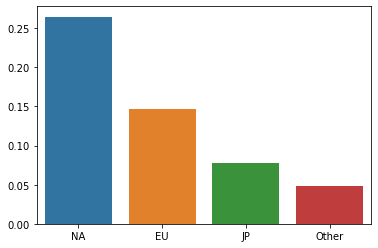

In [12]:
# 不同区域平均每个游戏销售量
sns.barplot(x=['NA','EU','JP','Other'],y=[avg_NA_sales,avg_EU_sales,avg_JP_sales,avg_other_sales])

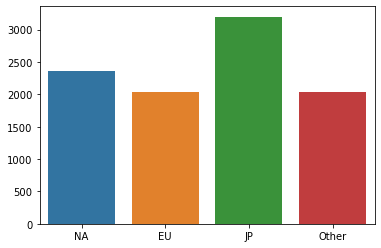

In [13]:
# 不同区域加权排名，欧洲游戏做的较好
sns.barplot(x=['NA','EU','JP','Other'],y=[weighted_NA_rank,weighted_EU_rank,weighted_JP_rank,weighted_other_rank])

<b>不同年份</b>

In [14]:
# 去除年份为na的行
data=df.dropna(subset=['Year'])

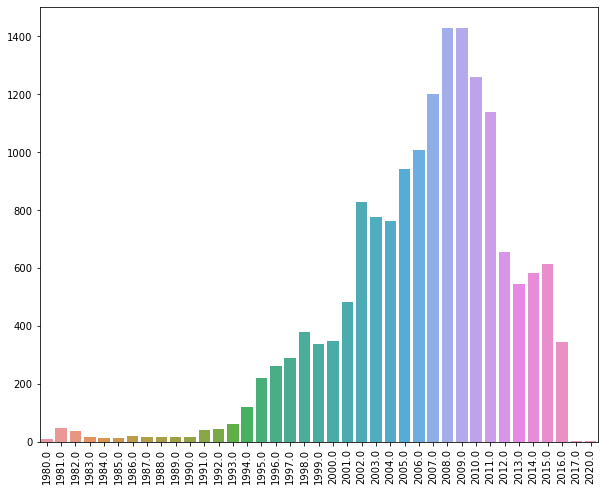

In [21]:
# 不同年份发行的游戏数
df2=data.Year.value_counts().sort_index()
# df2=data.groupby(by='Year').size()这样也行
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
# 结论：1991年到2008年，是游戏产业的飞速发展阶段
sns.barplot(x=df2.index,y=df2.values)

In [31]:
# 不同年份游戏的总体销量
df3=data.groupby(by='Year').sum()

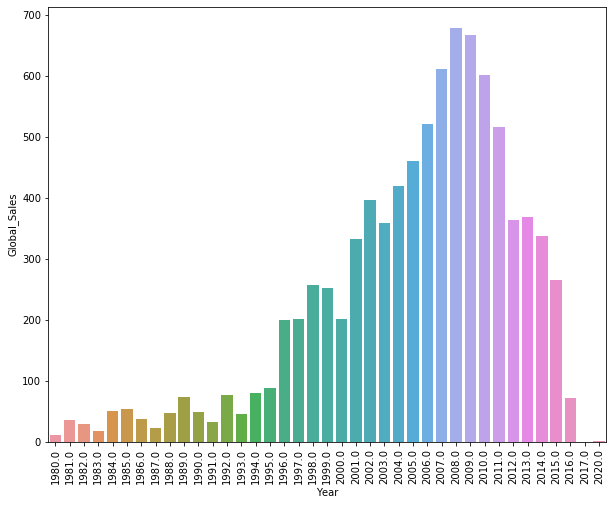

In [32]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
# 全球销量，与游戏种类趋势一致
sns.barplot(x=df3.index,y='Global_Sales',data=df3)

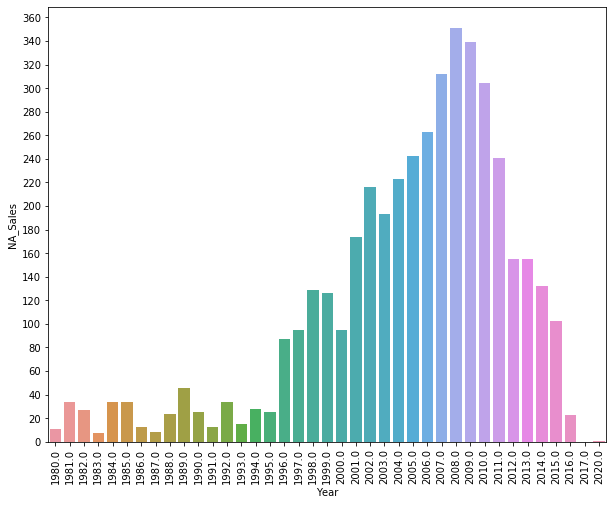

In [33]:

fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
# 统一刻度间距
plt.yticks(range(0,400,20))
# 北美起步较早，与总趋势基本一致
sns.barplot(x=df3.index,y='NA_Sales',data=df3)

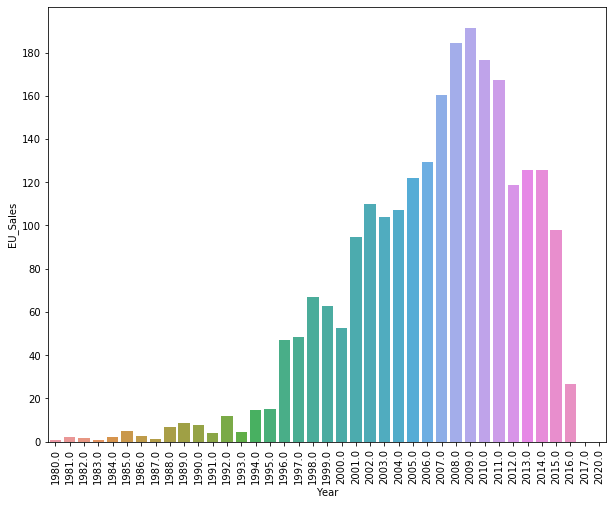

In [34]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.yticks(range(0,200,20))
# 欧洲与总趋势基本一致
sns.barplot(x=df3.index,y='EU_Sales',data=df3)

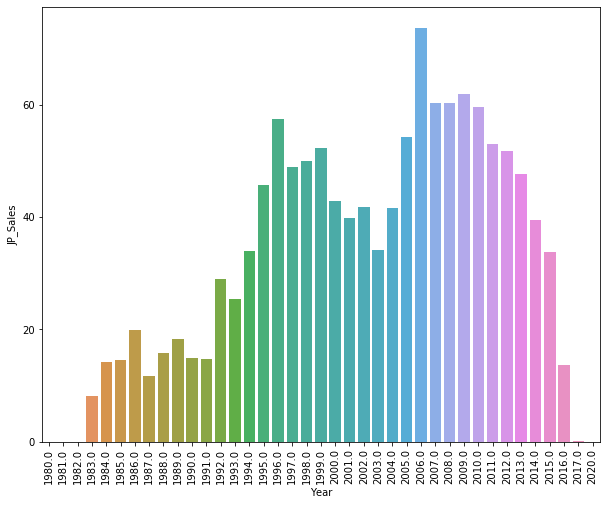

In [35]:
# 结论：从量看，日本游戏发行数量并不多
# 从成长趋势看，日本游戏起步也较早，经历2个峰值，第一个在96年左右，第二个与总趋势一致
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.yticks(range(0,80,20))
sns.barplot(x=df3.index,y='JP_Sales',data=df3)

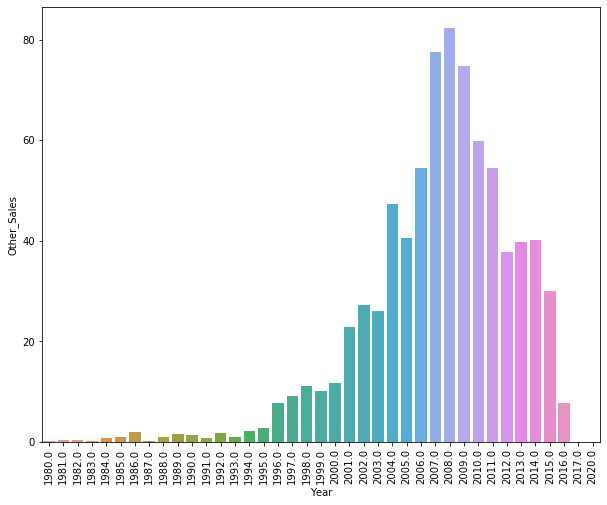

In [36]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.yticks(range(0,100,20))
# 其他地区与总体趋势一致
sns.barplot(x=df3.index,y='Other_Sales',data=df3)

<b>不同游戏类型</b>

In [37]:
# 不同游戏类型
df4=df.groupby(by='Genre').sum()
df4

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,26441383,6531731.0,877.83,525.00,159.95,187.38,1751.18
Adventure,14831165,2562375.0,105.80,64.13,52.07,16.81,239.04
Fighting,6484242,1675871.0,223.59,101.32,87.35,36.68,448.91
Misc,14889052,3432412.0,410.24,215.98,107.76,75.32,809.96
Platform,6137545,1755347.0,447.05,201.63,130.77,51.59,831.37
Puzzle,5603136,1144994.0,123.78,50.78,57.31,12.55,244.95
Racing,9943933,2457934.0,359.42,238.39,56.69,77.27,732.04
Role-Playing,12032228,2952379.0,327.28,188.06,352.31,59.61,927.37
Shooter,9653872,2571588.0,582.60,313.27,38.28,102.69,1037.37


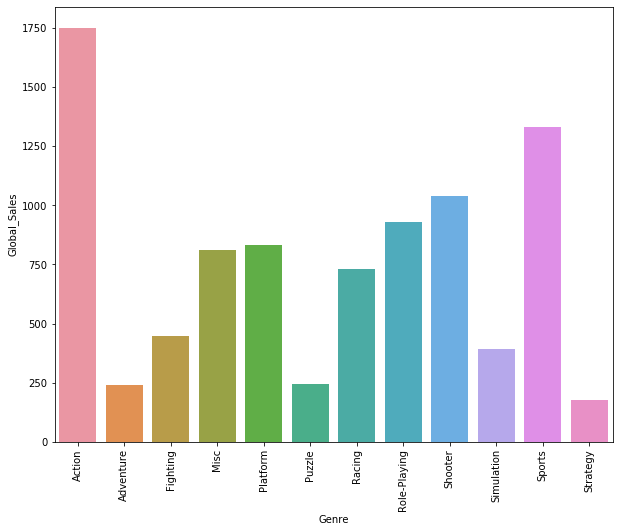

In [43]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
# 全球
sns.barplot(x=df4.index,y='Global_Sales',data=df4)

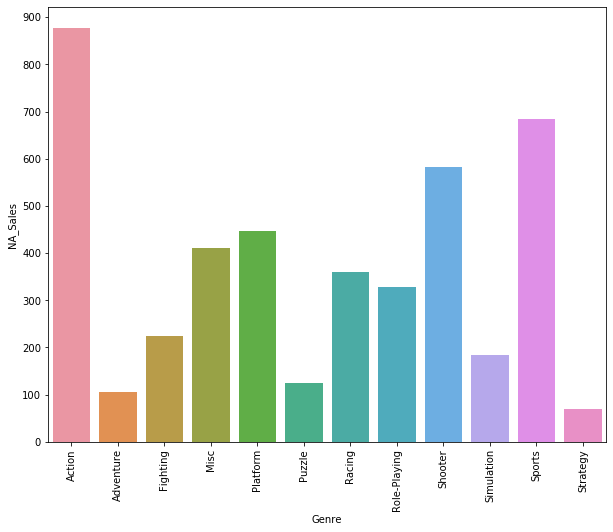

In [39]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.yticks(range(0,1000,100))
# 在北美，销售量前3的游戏类型为动作，运动，射击
sns.barplot(x=df4.index,y='NA_Sales',data=df4)

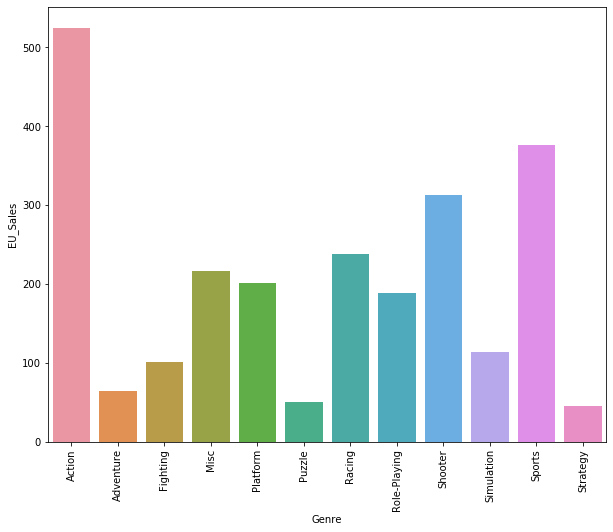

In [40]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.yticks(range(0,700,100))
# 欧洲趋势差不多
sns.barplot(x=df4.index,y='EU_Sales',data=df4)

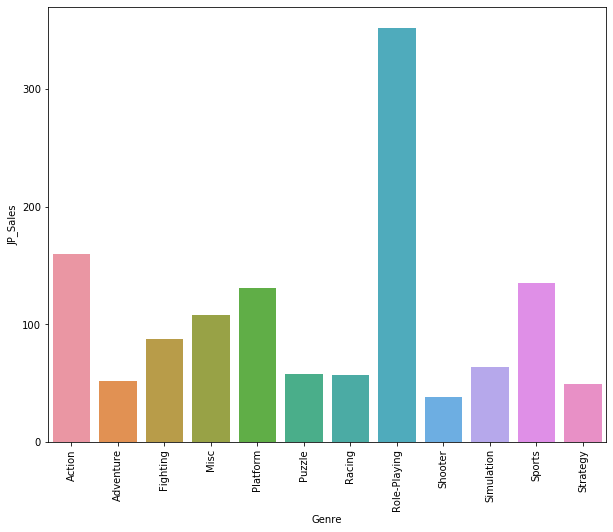

In [41]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.yticks(range(0,500,100))
# 从趋势上看，日本人偏爱角色扮演，竞速和射击相对前2个区域较少
sns.barplot(x=df4.index,y='JP_Sales',data=df4)

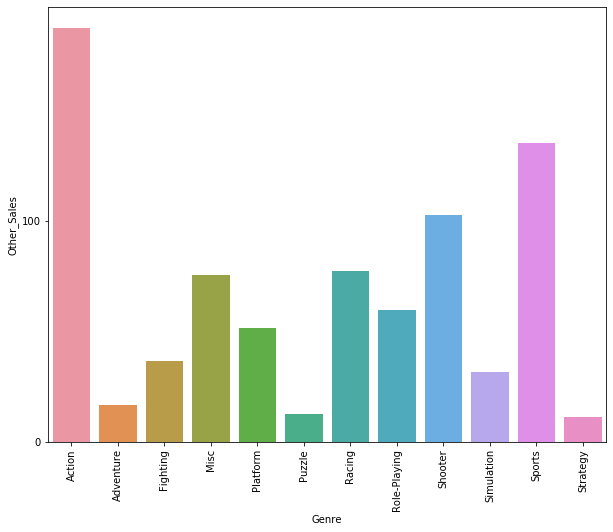

In [42]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
plt.yticks(range(0,300,100))
# 差不多
sns.barplot(x=df4.index,y='Other_Sales',data=df4)

<b>全球游戏销量前10的发行商</b>

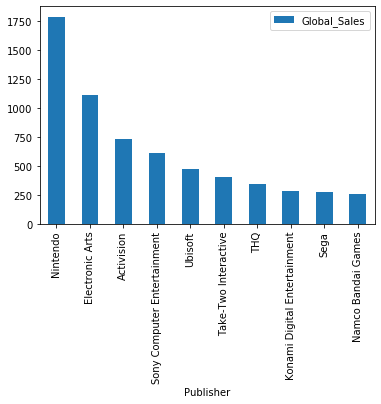

In [59]:
df.groupby(by='Publisher').sum().sort_values(by='Global_Sales',ascending=False).iloc[0:10,[-1]].plot(kind='bar')

<b>考察前100名游戏</b>

In [61]:
# 前100名游戏
df6=df.iloc[0:100,:]
df6

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


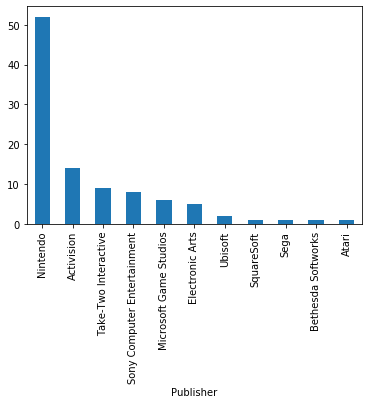

In [62]:
# 前100名游戏中各发行商的占比，考察欢迎度
df6.groupby(by='Publisher').size().sort_values(ascending=False).plot(kind='bar')

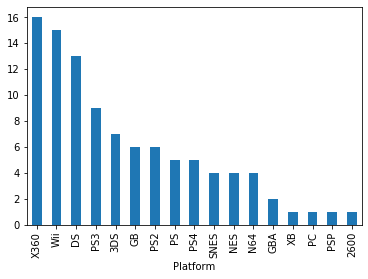

In [63]:
# 前100名游戏的平台分布
df6.groupby(by='Platform').size().sort_values(ascending=False).plot(kind='bar')

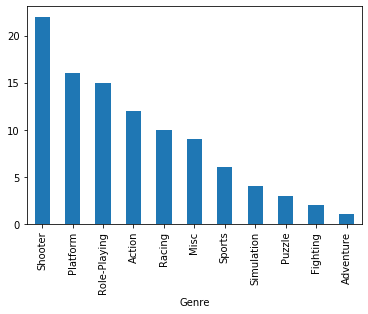

In [64]:
# 前100名游戏的游戏类型分布
df6.groupby(by='Genre').size().sort_values(ascending=False).plot(kind='bar')

<b>平台</b>

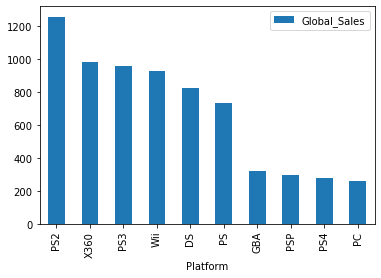

In [56]:
# 全球销售量前10的平台
df.groupby(by='Platform').sum().sort_values(by='Global_Sales',ascending=False).iloc[0:10,[-1]].plot(kind='bar')

In [38]:
# 不同平台的游戏类型
# 根据2种类别分组，再根据2个类别排序，排序主要是为了取前面几个，全取则不排序
df7=df.groupby(by=['Platform','Genre']).sum().sort_values(by=['Platform','Global_Sales'],ascending=[True,False])
df7

Rank      Year  NA_Sales  EU_Sales  JP_Sales  \
Platform Genre                                                        
2600     Action      303231  109013.0     27.39      1.64      0.00   
         Shooter      72992   43611.0     24.68      1.51      0.00   
         Puzzle       41827   15865.0     13.68      0.86      0.00   
         Platform     16723   17836.0     12.38      0.72      0.00   
         Misc         19364    9902.0      3.34      0.20      0.00   
...                     ...       ...       ...       ...       ...   
XOne     Adventure   133071   24176.0      1.20      1.08      0.03   
         Fighting     58588   14103.0      1.58      0.52      0.01   
         Platform     36647    8059.0      0.44      0.29      0.00   
         Simulation   29687    6044.0      0.28      0.21      0.00   
         Strategy     32027    6044.0      0.26      0.10      0.00   

                     Other_Sales  Global_Sales  
Platform Genre                                  
2600     Action             0.22         29.34  
         Shooter            0.28         26.48  
         Puzzle             0.15         14.68  
         Platform           0.16         13.27  
         Misc               0.03          3.58  
...                          ...           ...  
XOne     Adventure          0.20          2.51  
         Fighting           0.23          2.31  
         Platform           0.07          0.81  
         Simulation         0.05          0.54  
         Strategy           0.03          0.38  

[293 rows x 7 columns]

In [92]:
# 不同平台下，各取出全球销量前3的游戏类型，可视化展示
df7_index=df7.index.to_list()#不知道如何合并多个MultiIndex，先转为list吧
n=3#每个一级索引下选择前3个二级索引条目，这里全取。全取可以更简单
indexes=list()#保存选取的index
sumed=0
for platform in sorted(df.Platform.unique()):
    length=len(df7.loc[(platform,slice(None)),:])#每个一级索引的条目，注意这个loc里面的参数，因为是多重索引
    if length>n:
        indexes.append(df7_index[sumed:sumed+n])
    else:#不足n
        indexes.append(df7_index[sumed:sumed+length])
    sumed=sumed+length

indexes=sum(indexes,[])#展开列表

target_multiIndex=pd.MultiIndex.from_tuples(indexes,names=['Platform', 'Genre'])#获取到目标多重索引

df8=df7.loc[target_multiIndex,:].reset_index(level=0).reset_index(level=0)#2次reset，将二重索引转变为列



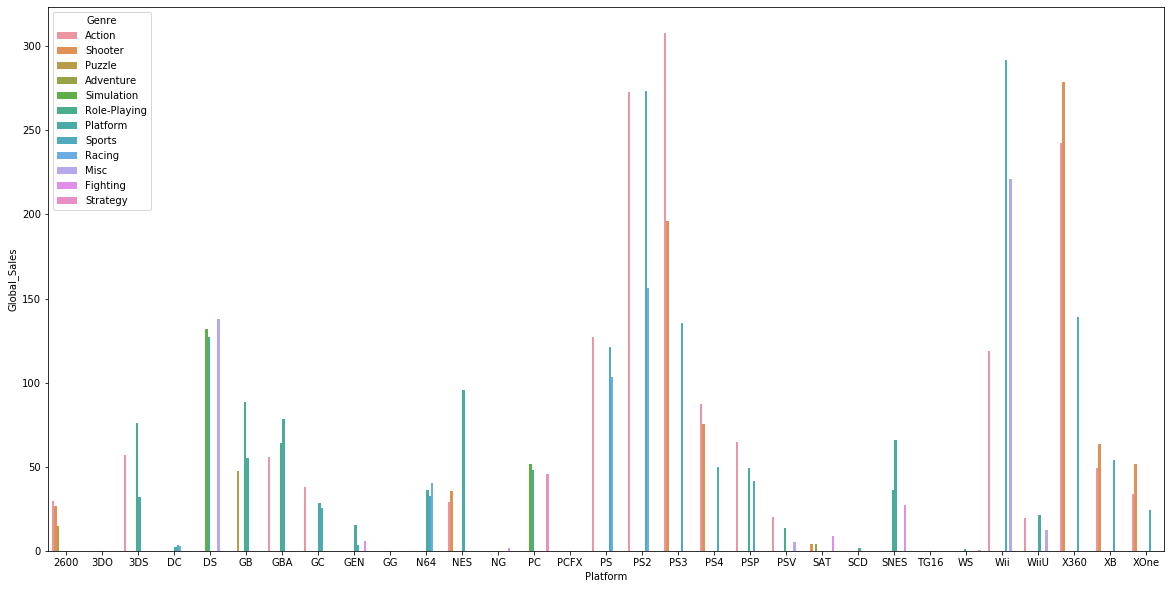

In [98]:
# 可视化
fig=plt.figure(figsize=(20,10))
# 这个展示效果不佳
sns.barplot(x='Platform',y='Global_Sales',hue='Genre',data=df8)

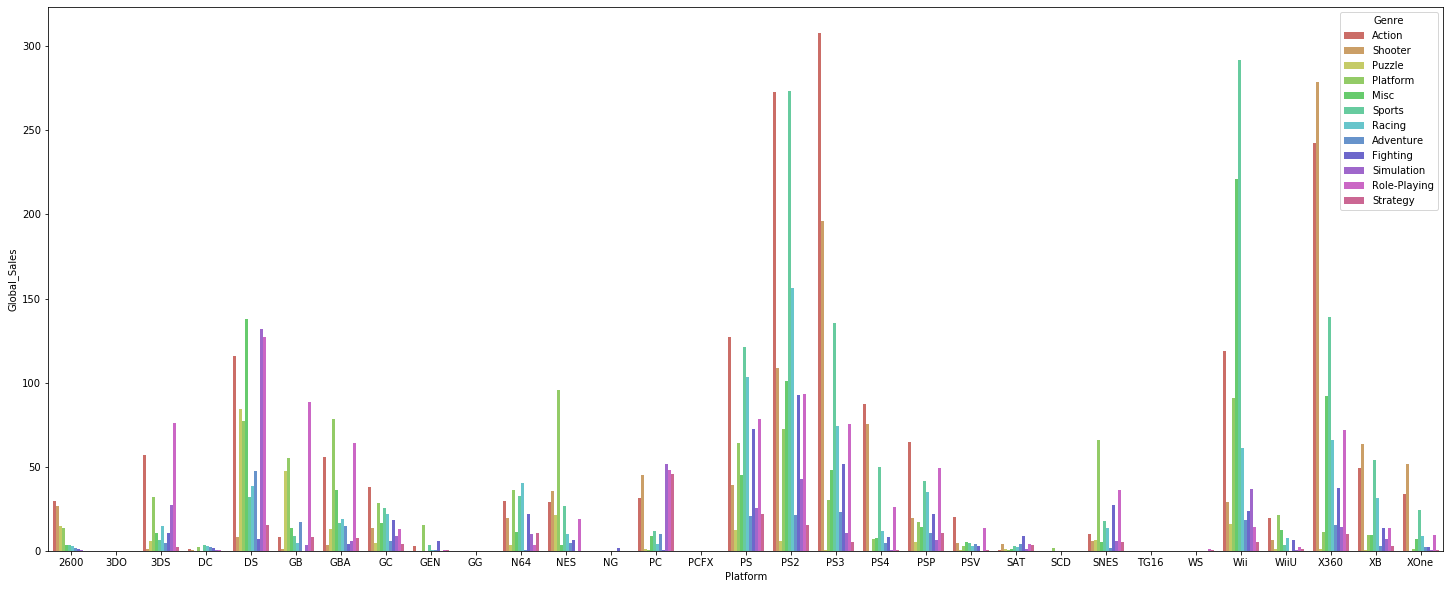

In [104]:
# 所有平台下，不同游戏类型的总销量
# 上面可以一步到位，不过显示的是所有游戏类型
fig=plt.figure(figsize=(25,10))
# palette：调色板，将颜色空间均分为12个
sns.barplot(x='Platform',y='Global_Sales',hue='Genre',data=df7.reset_index(level=[0,1]),palette=sns.color_palette("hls",12))

<b>sum换成count，统计不同平台下各游戏类型的数目，前面是全球销售量，这里看看游戏类型对平台的偏好</b>

In [105]:
df9=df.groupby(by=['Platform','Genre']).count().sort_values(by=['Platform','Global_Sales'],ascending=[True,False])
df9

Rank  Name  Year  Publisher  NA_Sales  EU_Sales  \
Platform Genre                                                         
2600     Action        61    61    55         61        61        61   
         Shooter       24    24    22         24        24        24   
         Sports        12    12    10         12        12        12   
         Puzzle        11    11     8         11        11        11   
         Platform       9     9     9          9         9         9   
...                   ...   ...   ...        ...       ...       ...   
XOne     Adventure     12    12    12         12        12        12   
         Fighting       7     7     7          7         7         7   
         Platform       4     4     4          4         4         4   
         Simulation     3     3     3          3         3         3   
         Strategy       3     3     3          3         3         3   

                     JP_Sales  Other_Sales  Global_Sales  
Platform Genre                                            
2600     Action            61           61            61  
         Shooter           24           24            24  
         Sports            12           12            12  
         Puzzle            11           11            11  
         Platform           9            9             9  
...                       ...          ...           ...  
XOne     Adventure         12           12            12  
         Fighting           7            7             7  
         Platform           4            4             4  
         Simulation         3            3             3  
         Strategy           3            3             3  

[293 rows x 9 columns]

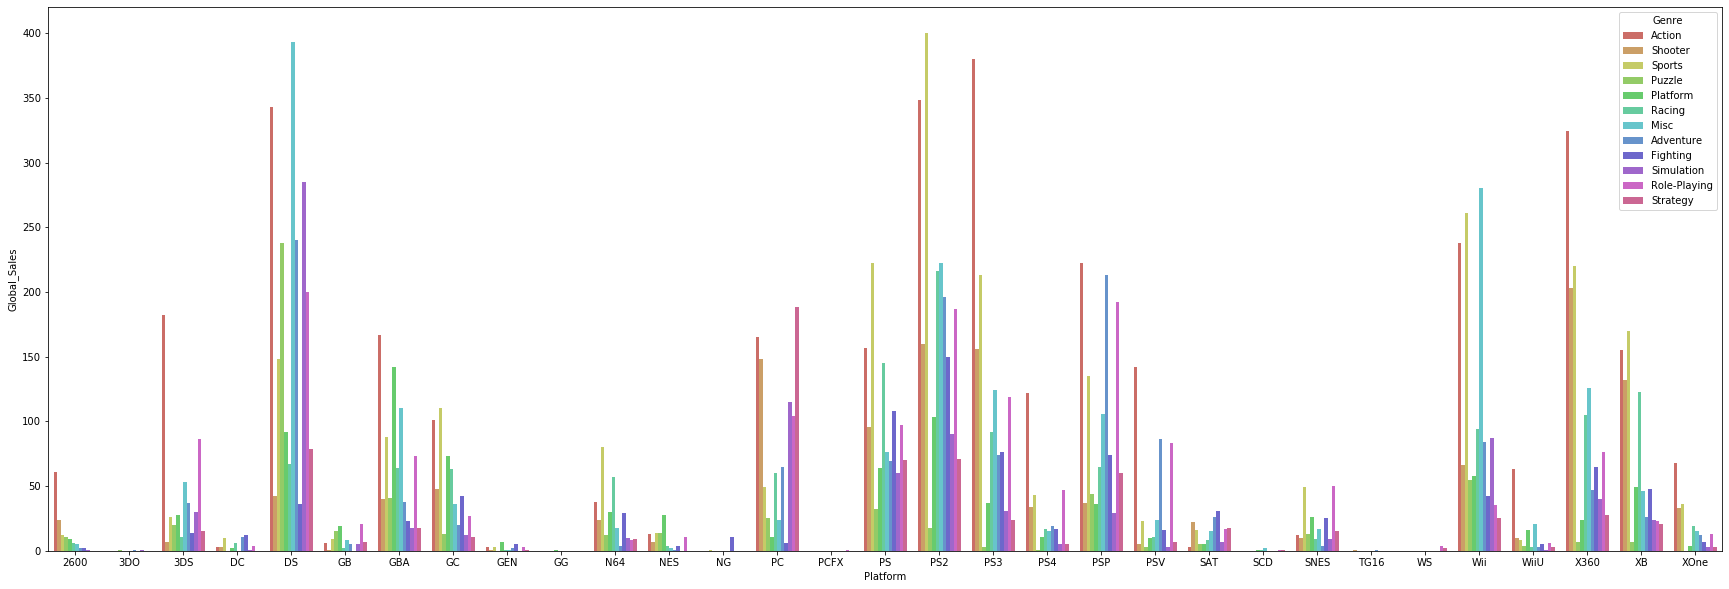

In [108]:
# 可视化
fig=plt.figure(figsize=(30,10))
# palette：调色板，将颜色空间均分为12个
# 同理，我们也可以统计前几个，这个可视化的结果更容易看清楚
# 这里也可以切分数据，比如将这么多平台分几次展示，每次展示一部分平台
sns.barplot(x='Platform',y='Global_Sales',hue='Genre',data=df9.reset_index(level=[0,1]),palette=sns.color_palette("hls",12))

<b>分3次展示31个平台的游戏类型数目</b>

In [125]:
# 展开df9
df10=df9.reset_index(level=[0,1])
# 得到所有平台
all_Platforms=df.Platform.unique()
# 分3次展示
Platforms_1=all_Platforms[:10]
Platforms_2=all_Platforms[10:20]
Platforms_3=all_Platforms[20:]

In [126]:
df11=df10[df10['Platform'].isin(Platforms_1)]
df12=df10[df10['Platform'].isin(Platforms_2)]
df13=df10[df10['Platform'].isin(Platforms_3)]

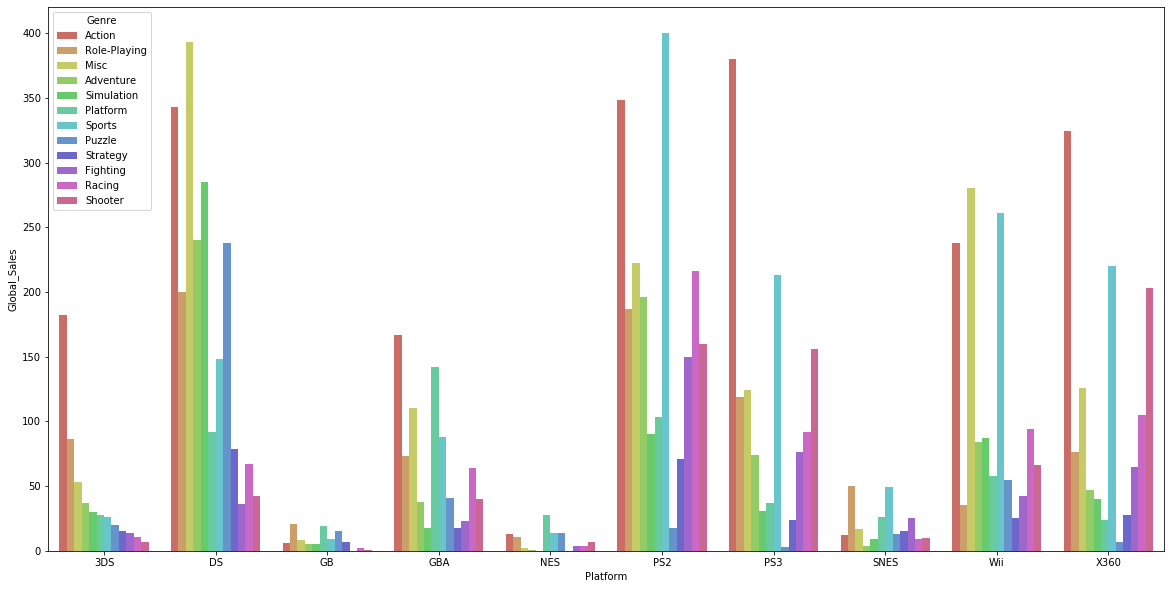

In [127]:
fig=plt.figure(figsize=(20,10))
# 比如可以看到，对PS2和PS3来说，动作和运动类游戏更多
sns.barplot(x='Platform',y='Global_Sales',hue='Genre',data=df11,palette=sns.color_palette("hls",12))

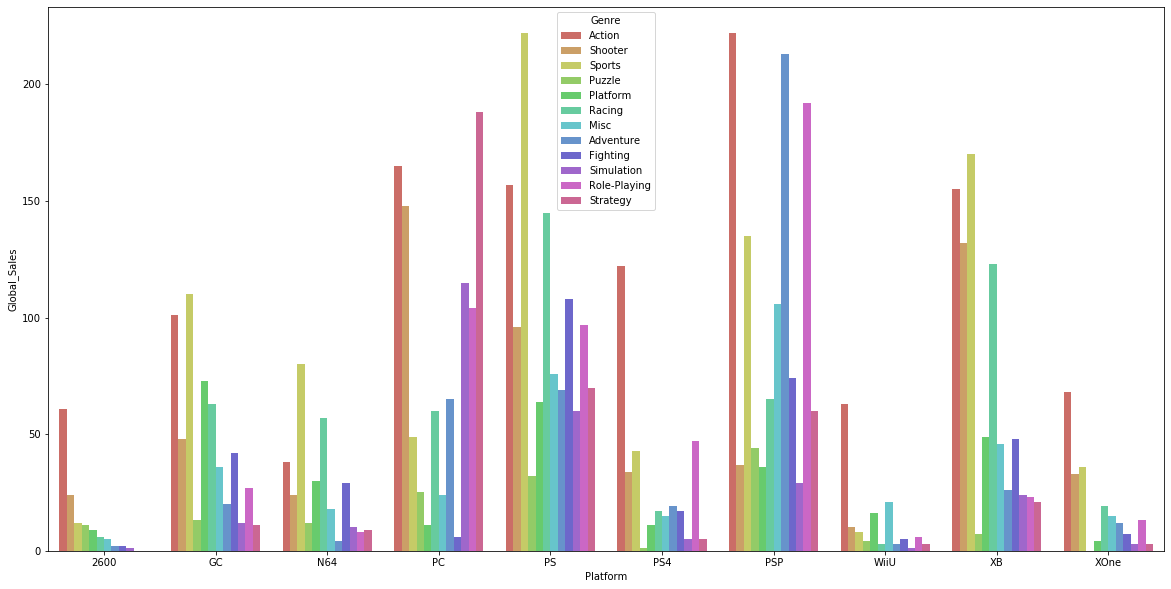

In [128]:
fig=plt.figure(figsize=(20,10))
# 对PC来说，策略、动作、射击为最多的游戏类型，对PS系列来说，动作、运动类一直很多
sns.barplot(x='Platform',y='Global_Sales',hue='Genre',data=df12,palette=sns.color_palette("hls",12))

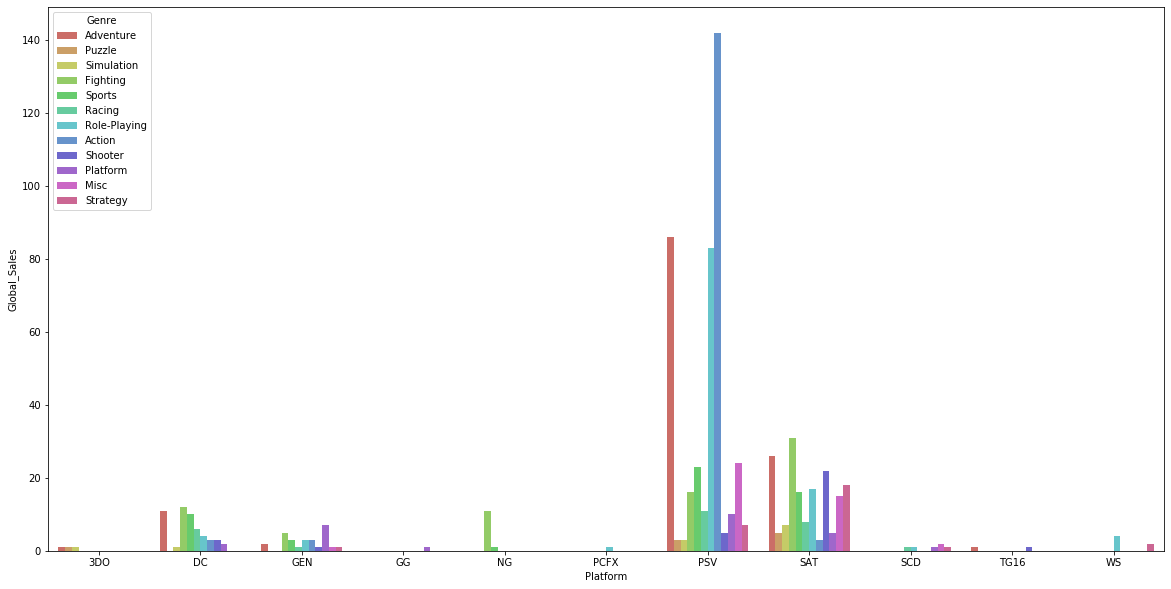

In [129]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x='Platform',y='Global_Sales',hue='Genre',data=df13,palette=sns.color_palette("hls",12))

<b>不同平台的加权排名，以总销量和排名计算</b>

In [142]:
def get_score(platform):
    df_tmp=df[df['Platform']==platform]
    return (df_tmp['Rank']*df_tmp['Global_Sales']).sum()/df_tmp['Global_Sales'].sum()

In [143]:
x=[]
y=[]
for platform in df.Platform.unique():
    x.append(platform)
    y.append(get_score(platform))

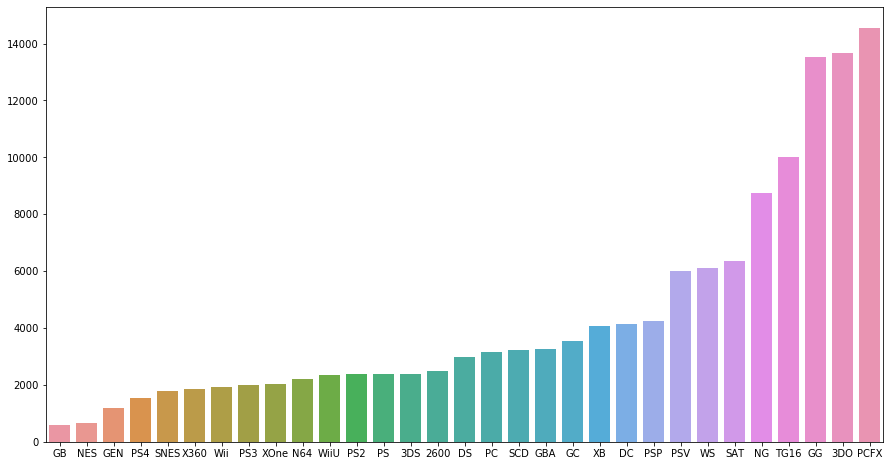

In [161]:
# 使用np对结果排序
import numpy as np
idx=np.argsort(y)
platforms=np.array(x)[idx]
scores=np.array(y)[idx]
fig=plt.figure(figsize=(15,8))
sns.barplot(x=platforms,y=scores)#排名越小越好

<b>建模预测不同年份、游戏类型、平台、发行商的游戏在各区域的销量和全球的销量</b>

In [67]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [10]:
# 去除缺少Publisher，Year的行
data=df.dropna(subset=['Publisher','Year'])

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [74]:
# 先看看各个列有多少不同数据
for col in data.columns:
    print(data[col].nunique())

16291
11325
31
39
12
576
408
305
244
157
621


<b>发行商有576个，有点多；再处理一下，根据发行游戏数目取前100的发行商</b>

In [11]:
pubs=data.groupby(by='Publisher').count().sort_values(by='Global_Sales',ascending=False).head(100).index

In [12]:
final_data=data[data['Publisher'].isin(pubs)]

In [83]:
# 16291中取14457
final_data.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


<b>需要注意的是，排名与总销量是完全呈反比趋势，先不用排名特征</b>

In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14457 entries, 0 to 16595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          14457 non-null  int64  
 1   Name          14457 non-null  object 
 2   Platform      14457 non-null  object 
 3   Year          14457 non-null  float64
 4   Genre         14457 non-null  object 
 5   Publisher     14457 non-null  object 
 6   NA_Sales      14457 non-null  float64
 7   EU_Sales      14457 non-null  float64
 8   JP_Sales      14457 non-null  float64
 9   Other_Sales   14457 non-null  float64
 10  Global_Sales  14457 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.3+ MB


In [14]:
# 展开object类型
data_tofit=pd.get_dummies(final_data,columns=['Platform','Genre','Publisher'])

In [86]:
data_tofit.columns

Index(['Rank', 'Name', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales', 'Platform_2600', 'Platform_3DO',
       ...
       'Publisher_Tomy Corporation', 'Publisher_Ubisoft',
       'Publisher_Universal Interactive', 'Publisher_Unknown',
       'Publisher_Virgin Interactive', 'Publisher_Vivendi Games',
       'Publisher_Warner Bros. Interactive Entertainment',
       'Publisher_Zoo Digital Publishing', 'Publisher_Zoo Games',
       'Publisher_Zushi Games'],
      dtype='object', length=150)

In [42]:
data_tofit.columns

Index(['Rank', 'Name', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales', 'Platform_2600', 'Platform_3DO',
       ...
       'Publisher_Tomy Corporation', 'Publisher_Ubisoft',
       'Publisher_Universal Interactive', 'Publisher_Unknown',
       'Publisher_Virgin Interactive', 'Publisher_Vivendi Games',
       'Publisher_Warner Bros. Interactive Entertainment',
       'Publisher_Zoo Digital Publishing', 'Publisher_Zoo Games',
       'Publisher_Zushi Games'],
      dtype='object', length=150)

In [15]:
# 得到训练需要的数据
X=data_tofit.drop(axis=1,columns=['Rank','Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']).values
Y=data_tofit['Global_Sales'].values

from sklearn.model_selection import train_test_split

# 划分测试集
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=41)

In [41]:
X_train,y_train

(array([[2002.,    0.,    0., ...,    0.,    0.,    0.],
        [2002.,    0.,    0., ...,    0.,    0.,    0.],
        [2014.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [2006.,    0.,    0., ...,    0.,    0.,    0.],
        [2002.,    0.,    0., ...,    0.,    0.,    0.],
        [2002.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([0.14, 0.96, 0.12, ..., 0.04, 1.8 , 1.  ]))

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
# 先使用随机森林回归试试
rfr=RandomForestRegressor(n_estimators=100,n_jobs=-1)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [28]:
y_pred=rfr.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error
# 0.550318718901729
mean_absolute_error(y_pred,y_test)

0.5498952727262699

In [122]:
y_test.max(),y_test.min(),y_test.mean(),y_test.std()

(35.82, 0.01, 0.6075587828492393, 1.5050119546869596)

In [19]:
# 自定义平均绝对百分误差函数
# 平均绝对百分误差，大于10%-20%即不靠谱
def mean_absolute_percentage_error(y_true,y_cal):
    arr=abs(y_true-y_cal)/y_true
    return arr.sum()/len(arr)
    

In [30]:
# 这个偏差还是有点大
mean_absolute_percentage_error(y_test,y_pred)

2.7579463682529552

In [31]:
r2_score(y_test,y_pred)# 接近0了，模型不好

0.01138465919268472

<b>网格搜索，模型对比</b>

In [20]:
from sklearn.model_selection import GridSearchCV

In [124]:
# 运行比较慢，这里没有添加min_samples_split参数
params={"n_estimators":range(100,501,100),"min_samples_leaf":range(1,6,1)}
regressor=RandomForestRegressor()
# scoring使用负值，因为优化的目标总是提高其值
model=GridSearchCV(regressor,param_grid=params,scoring='neg_mean_absolute_error',n_jobs=-1)
model.fit(X_train,y_train)
model.best_params_

{'min_samples_leaf': 4, 'n_estimators': 300}

In [137]:
# 平均绝对误差下降了，但是平均绝对百分误差升高了，应该跟优化目标有关
y_pred=model.best_estimator_.predict(X_test)
mean_absolute_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred)

(0.5345144198552473, 2.9879163686141497)

In [139]:
# min_samples_split要和min_samples_leaf相应变化较好，这里又是平均绝对误差下降了，但是平均绝对百分误差升高。优化不明显了
optimized_model=RandomForestRegressor(n_estimators=300,min_samples_leaf=4,min_samples_split=8)
optimized_model.fit(X_train,y_train)
y_pred=optimized_model.predict(X_test)
mean_absolute_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred)


(0.5342275933121885, 2.9936392934598444)

In [21]:
# 后续：使用r2评分，因为量纲差距大
params={"n_estimators":range(100,501,100),"min_samples_split":range(2,15,2)}
regressor=RandomForestRegressor()
# scoring使用负值，因为优化的目标总是提高其值
model=GridSearchCV(regressor,param_grid=params,scoring='r2',n_jobs=-1)
model.fit(X_train,y_train)
model.best_params_

{'min_samples_split': 14, 'n_estimators': 400}

In [25]:
model=RandomForestRegressor(min_samples_split=14,n_estimators=400,n_jobs=-1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# 有所改善
mean_absolute_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred)

(0.5318760461502036, 2.927860035139973)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)# 依然很差

0.08714888488197903

In [32]:
# 使用SVR对比
from sklearn.svm import SVR

In [36]:
import numpy as np
svr=SVR(max_iter=2000)
params={'gamma':np.arange(0.2,0.8,0.1)}
gs=GridSearchCV(svr,param_grid=params,scoring='r2',n_jobs=-1)
gs.fit(X_train,y_train)
gs.best_params_

{'gamma': 0.4000000000000001}

In [38]:
svr=SVR(max_iter=5000,gamma=0.4)
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
# svr也不行
mean_absolute_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred),r2_score(y_test,y_pred)

(0.4770402328160612, 2.2108302691274204, 0.07733376796741487)

In [53]:
# poly更差
svr=SVR(max_iter=5000,kernel='poly')
svr.fit(X_train,y_train)
# gs.best_params_

y_pred=svr.predict(X_test)
# svr也不行
mean_absolute_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred),r2_score(y_test,y_pred)

(40.87744121715076, 521.8040269451537, -737.7131178581791)

In [54]:
data_tofit.columns

Index(['Rank', 'Name', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales', 'Platform_2600', 'Platform_3DO',
       ...
       'Publisher_Tomy Corporation', 'Publisher_Ubisoft',
       'Publisher_Universal Interactive', 'Publisher_Unknown',
       'Publisher_Virgin Interactive', 'Publisher_Vivendi Games',
       'Publisher_Warner Bros. Interactive Entertainment',
       'Publisher_Zoo Digital Publishing', 'Publisher_Zoo Games',
       'Publisher_Zushi Games'],
      dtype='object', length=150)

In [55]:
# 综上，要么是特征没选好（也没什么可加的，或许以地区销量预测全球销量可以试试），
# 要么就是数据本身不好预测（同一个发行商、游戏类型、平台等既有好的也有坏的游戏）

# 去除年份，加入北美销量（显然地区销量可大致预测全球销量）
X=data_tofit.drop(axis=1,columns=['Rank','Name','Year','EU_Sales','JP_Sales','Other_Sales','Global_Sales']).values
Y=data_tofit['Global_Sales'].values
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=41)

In [56]:
# r2评分很高了
svr=SVR(max_iter=5000)
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
mean_absolute_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred),r2_score(y_test,y_pred)

(0.1976074102343806, 0.8861678490853161, 0.8204537027676734)

In [57]:
# 网格搜索优化一下
svr=SVR(max_iter=2000)
params={'gamma':np.arange(0.2,0.8,0.1)}
gs=GridSearchCV(svr,param_grid=params,scoring='r2',n_jobs=-1)
gs.fit(X_train,y_train)
gs.best_params_

{'gamma': 0.2}

In [58]:
# 说明gamma不够小，默认的0就很好了
svr=SVR(max_iter=5000,gamma=0.2)
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
mean_absolute_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred),r2_score(y_test,y_pred)

(0.19137133912036927, 1.028037982682585, 0.7512677796431918)

In [59]:
# 采用了地区销量后，随机森林回归也能很好预测，且还没优化
rfr=RandomForestRegressor(n_estimators=300,n_jobs=-1)
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
mean_absolute_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred),r2_score(y_test,y_pred)

(0.18726952098815525, 0.7660492339381244, 0.8647266202611992)